In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
torch.manual_seed(1234)

## 原始代码

In [2]:
true_w = torch.tensor([2, -3.4]).view(-1, 1)
true_b = torch.tensor([4.2]).view(-1, 1)

In [3]:
def get_fake_data():
    X = torch.linspace(1, 100, 100).view(50, 2)
    y = torch.mm(X, true_w) + true_b + 0.1 * torch.randn(50,1)
    return X, y

In [4]:
X, y = get_fake_data()

In [5]:
lr = 0.1
epochs = 50

In [6]:
# NN weights
w = torch.randn(2, 1).requires_grad_(True)
b = torch.randn(1, 1).requires_grad_(True)

In [7]:
def train(epoch):
    y_out = torch.mm(X, w) + b
    loss = 0.5 * (y - y_out) ** 2
    loss = loss.mean()
    # BP
    loss.backward()
    w.data.sub_(lr * w.grad.data)
    b.data.sub_(lr * b.grad.data)
    # clear grad
    w.grad.data.zero_()
    b.grad.data.zero_()
    il = loss.detach().item()
    print('[{:>3}/{}]: {:.5f}'.format(epoch, epochs, il))
    return il

In [8]:
L = []
for epoch in range(1, epochs + 1):
    il = train(epoch)
    L.append(il)

[  1/50]: 1476.52271
[  2/50]: 674247936.00000
[  3/50]: 307899192573952.00000
[  4/50]: 140603937274971815936.00000
[  5/50]: 64207568262302781027647488.00000
[  6/50]: 29320750065869307107970023161856.00000
[  7/50]: inf
[  8/50]: inf
[  9/50]: inf
[ 10/50]: inf
[ 11/50]: inf
[ 12/50]: inf
[ 13/50]: inf
[ 14/50]: inf
[ 15/50]: inf
[ 16/50]: nan
[ 17/50]: nan
[ 18/50]: nan
[ 19/50]: nan
[ 20/50]: nan
[ 21/50]: nan
[ 22/50]: nan
[ 23/50]: nan
[ 24/50]: nan
[ 25/50]: nan
[ 26/50]: nan
[ 27/50]: nan
[ 28/50]: nan
[ 29/50]: nan
[ 30/50]: nan
[ 31/50]: nan
[ 32/50]: nan
[ 33/50]: nan
[ 34/50]: nan
[ 35/50]: nan
[ 36/50]: nan
[ 37/50]: nan
[ 38/50]: nan
[ 39/50]: nan
[ 40/50]: nan
[ 41/50]: nan
[ 42/50]: nan
[ 43/50]: nan
[ 44/50]: nan
[ 45/50]: nan
[ 46/50]: nan
[ 47/50]: nan
[ 48/50]: nan
[ 49/50]: nan
[ 50/50]: nan


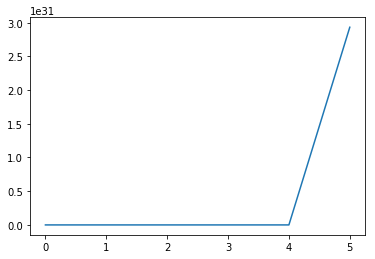

In [9]:
plt.plot(L)

In [10]:
print('W: \n{}'.format(w.detach().numpy()))
print('b: \n{}'.format(b.detach().numpy()))

W: 
[[nan]
 [nan]]
b: 
[[nan]]


## 调整学习速率

In [11]:
# NN weights
torch.manual_seed(1234)
w = torch.randn(2, 1).requires_grad_(True)
b = torch.randn(1, 1).requires_grad_(True)

In [12]:
lr = 1e-4

In [13]:
L = []
for epoch in range(1, epochs + 1):
    il = train(epoch)
    L.append(il)

[  1/50]: 5568.02197
[  2/50]: 582.35992
[  3/50]: 61.44717
[  4/50]: 7.02108
[  5/50]: 1.33448
[  6/50]: 0.74029
[  7/50]: 0.67816
[  8/50]: 0.67163
[  9/50]: 0.67090
[ 10/50]: 0.67078
[ 11/50]: 0.67072
[ 12/50]: 0.67067
[ 13/50]: 0.67062
[ 14/50]: 0.67057
[ 15/50]: 0.67053
[ 16/50]: 0.67048
[ 17/50]: 0.67043
[ 18/50]: 0.67038
[ 19/50]: 0.67033
[ 20/50]: 0.67028
[ 21/50]: 0.67023
[ 22/50]: 0.67018
[ 23/50]: 0.67013
[ 24/50]: 0.67008
[ 25/50]: 0.67003
[ 26/50]: 0.66998
[ 27/50]: 0.66993
[ 28/50]: 0.66988
[ 29/50]: 0.66984
[ 30/50]: 0.66979
[ 31/50]: 0.66974
[ 32/50]: 0.66969
[ 33/50]: 0.66964
[ 34/50]: 0.66959
[ 35/50]: 0.66954
[ 36/50]: 0.66949
[ 37/50]: 0.66944
[ 38/50]: 0.66939
[ 39/50]: 0.66934
[ 40/50]: 0.66930
[ 41/50]: 0.66925
[ 42/50]: 0.66920
[ 43/50]: 0.66915
[ 44/50]: 0.66910
[ 45/50]: 0.66905
[ 46/50]: 0.66900
[ 47/50]: 0.66895
[ 48/50]: 0.66890
[ 49/50]: 0.66885
[ 50/50]: 0.66880


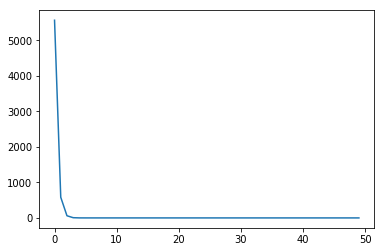

In [14]:
plt.plot(L)

In [15]:
print('W: \n{}'.format(w.detach().numpy()))
print('b: \n{}'.format(b.detach().numpy()))

W: 
[[-0.85548615]
 [-0.5098877 ]]
b: 
[[-1.0222034]]


## 归一化

In [16]:
# NN weights
torch.manual_seed(1234)
w = torch.randn(2, 1).requires_grad_(True)
b = torch.randn(1, 1).requires_grad_(True)

In [17]:
def get_fake_data():
    X = torch.linspace(1, 100, 100).view(50, 2)
    X = (X - X.mean(dim=0, keepdim=True)) / X.std(dim=0, keepdim=True)
    y = torch.mm(X, true_w) + true_b + 0.1 * torch.randn(50,1)
    return X, y

In [18]:
X, y = get_fake_data()

In [19]:
lr = 1e-1

In [20]:
L = []
for epoch in range(1, epochs + 1):
    il = train(epoch)
    L.append(il)

[  1/50]: 15.20759
[  2/50]: 12.04960
[  3/50]: 9.58689
[  4/50]: 7.65367
[  5/50]: 6.12758
[  6/50]: 4.91717
[  7/50]: 3.95337
[  8/50]: 3.18344
[  9/50]: 2.56676
[ 10/50]: 2.07173
[ 11/50]: 1.67367
[ 12/50]: 1.35311
[ 13/50]: 1.09467
[ 14/50]: 0.88612
[ 15/50]: 0.71770
[ 16/50]: 0.58161
[ 17/50]: 0.47159
[ 18/50]: 0.38261
[ 19/50]: 0.31063
[ 20/50]: 0.25237
[ 21/50]: 0.20523
[ 22/50]: 0.16706
[ 23/50]: 0.13617
[ 24/50]: 0.11115
[ 25/50]: 0.09089
[ 26/50]: 0.07449
[ 27/50]: 0.06120
[ 28/50]: 0.05044
[ 29/50]: 0.04173
[ 30/50]: 0.03467
[ 31/50]: 0.02895
[ 32/50]: 0.02432
[ 33/50]: 0.02058
[ 34/50]: 0.01754
[ 35/50]: 0.01508
[ 36/50]: 0.01309
[ 37/50]: 0.01147
[ 38/50]: 0.01016
[ 39/50]: 0.00910
[ 40/50]: 0.00825
[ 41/50]: 0.00755
[ 42/50]: 0.00699
[ 43/50]: 0.00653
[ 44/50]: 0.00616
[ 45/50]: 0.00587
[ 46/50]: 0.00562
[ 47/50]: 0.00543
[ 48/50]: 0.00527
[ 49/50]: 0.00514
[ 50/50]: 0.00504


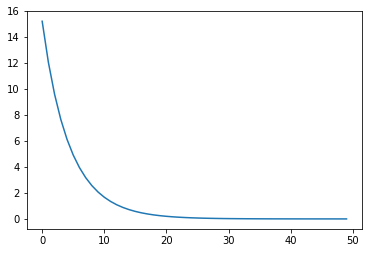

In [21]:
plt.plot(L)

In [22]:
print('W: \n{}'.format(w.detach().numpy()))
print('b: \n{}'.format(b.detach().numpy()))

W: 
[[-0.8705319]
 [-0.5142595]]
b: 
[[4.168556]]


## 随机化X

In [23]:
# NN weights
torch.manual_seed(1234)
w = torch.randn(2, 1).requires_grad_(True)
b = torch.randn(1, 1).requires_grad_(True)

In [24]:
def get_fake_data():
    X = torch.randn(50, 2)
    y = torch.mm(X, true_w) + true_b + 0.1 * torch.randn(50,1)
    return X, y

In [25]:
X, y = get_fake_data()

In [26]:
lr = 1e-1

In [27]:
L = []
for epoch in range(1, epochs + 1):
    il = train(epoch)
    L.append(il)

[  1/50]: 24.41483
[  2/50]: 19.44870
[  3/50]: 15.49367
[  4/50]: 12.34376
[  5/50]: 9.83496
[  6/50]: 7.83671
[  7/50]: 6.24504
[  8/50]: 4.97715
[  9/50]: 3.96713
[ 10/50]: 3.16249
[ 11/50]: 2.52144
[ 12/50]: 2.01068
[ 13/50]: 1.60371
[ 14/50]: 1.27942
[ 15/50]: 1.02099
[ 16/50]: 0.81504
[ 17/50]: 0.65089
[ 18/50]: 0.52005
[ 19/50]: 0.41575
[ 20/50]: 0.33260
[ 21/50]: 0.26631
[ 22/50]: 0.21345
[ 23/50]: 0.17130
[ 24/50]: 0.13768
[ 25/50]: 0.11087
[ 26/50]: 0.08948
[ 27/50]: 0.07241
[ 28/50]: 0.05880
[ 29/50]: 0.04793
[ 30/50]: 0.03926
[ 31/50]: 0.03233
[ 32/50]: 0.02681
[ 33/50]: 0.02239
[ 34/50]: 0.01887
[ 35/50]: 0.01605
[ 36/50]: 0.01380
[ 37/50]: 0.01200
[ 38/50]: 0.01057
[ 39/50]: 0.00942
[ 40/50]: 0.00850
[ 41/50]: 0.00776
[ 42/50]: 0.00718
[ 43/50]: 0.00670
[ 44/50]: 0.00633
[ 45/50]: 0.00603
[ 46/50]: 0.00578
[ 47/50]: 0.00559
[ 48/50]: 0.00543
[ 49/50]: 0.00531
[ 50/50]: 0.00521


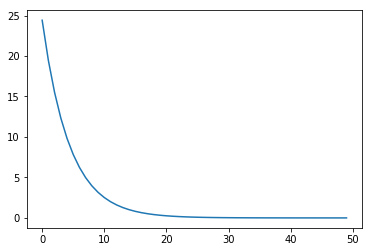

In [28]:
plt.plot(L)

In [29]:
print('W: \n{}'.format(w.detach().numpy()))
print('b: \n{}'.format(b.detach().numpy()))

W: 
[[ 2.0044322]
 [-3.4053428]]
b: 
[[4.1659384]]


## 广义逆

In [30]:
def get_fake_data():
    X = torch.linspace(1, 100, 100).view(50, 2)
    y = torch.mm(X, true_w) + true_b + 0.1 * torch.randn(50,1)
    return X, y

In [31]:
X, y = get_fake_data()
y = y - 4.2 # 不考虑b

In [32]:
X.shape, y.shape, w.shape

(torch.Size([50, 2]), torch.Size([50, 1]), torch.Size([2, 1]))

In [33]:
X_T = X.transpose(0, 1)
G_X = torch.mm(X_T, X)
w = torch.mm(torch.inverse(G_X), torch.mm(X_T, y))

In [34]:
print('W: \n{}'.format(w.detach().numpy()))

W: 
[[ 1.9667375]
 [-3.3663373]]


## 分析特征值

In [35]:
X = (X - X.mean(dim=0, keepdim=True)) / X.std(dim=0, keepdim=True)

In [36]:
X_T = X.transpose(0, 1)
G_X = torch.mm(X_T, X)

In [37]:
u, s, v = torch.svd(G_X)

In [38]:
s

tensor([9.8000e+01, 1.6248e-08])